In [49]:
!pip install pandas-datareader

In [50]:
#This program predicts stock prices 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [51]:
#Get the stock data
df = web.DataReader('NVDA', data_source='yahoo',start='2012-01-01',end='2020-04-29')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.400000,14.010000,14.300000,14.040000,11701100.0,12.922127
2012-01-04,14.260000,13.920000,14.050000,14.200000,8684300.0,13.069386
2012-01-05,14.780000,14.070000,14.130000,14.710000,14088700.0,13.538781
2012-01-06,14.710000,14.370000,14.700000,14.540000,13331300.0,13.382315
2012-01-09,14.820000,14.440000,14.550000,14.540000,12706100.0,13.382315
...,...,...,...,...,...,...
2020-04-23,293.140015,283.000000,287.839996,284.010010,10604000.0,284.010010
2020-04-24,289.670013,280.600006,283.600006,289.589996,8816100.0,289.589996
2020-04-27,303.500000,294.000000,294.989990,297.079987,11984700.0,297.079987


In [52]:
#Get the adjusted close price
df = df[['Close']]
print(df.head())

            Close
Date             
2012-01-03  14.04
2012-01-04  14.20
2012-01-05  14.71
2012-01-06  14.54
2012-01-09  14.54


In [53]:
#Get the number of rows and columns in the data set
df.shape

(2094, 1)

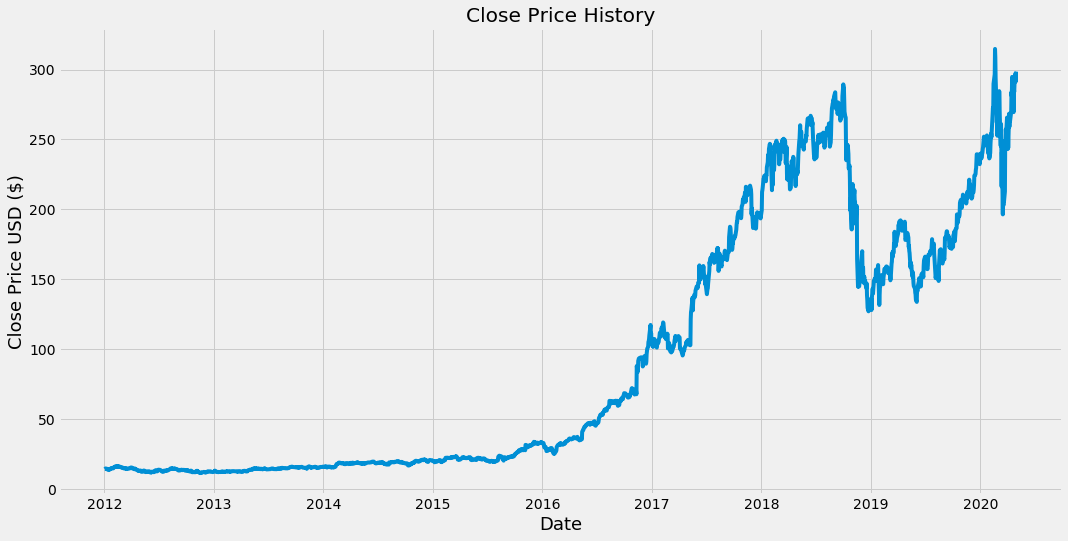

In [54]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [55]:
#Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1676

In [56]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00876962],
       [0.00929711],
       [0.0109785 ],
       ...,
       [0.94190945],
       [0.92305148],
       [0.94645912]])

In [57]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61: 
        print(x_train)
        print(y_train)
        print()

[array([0.00876962, 0.00929711, 0.0109785 , 0.01041804, 0.01041804,
       0.01022023, 0.00926414, 0.00896743, 0.00774759, 0.00705526,
       0.0085718 , 0.00979164, 0.00936305, 0.01064882, 0.01173678,
       0.01144006, 0.0109785 , 0.01163787, 0.01127522, 0.01117632,
       0.01170381, 0.01355004, 0.014638  , 0.01424238, 0.01437426,
       0.01625346, 0.01622049, 0.01490175, 0.01572596, 0.01602268,
       0.0157919 , 0.01671502, 0.01473691, 0.01500066, 0.014638  ,
       0.01493472, 0.0145391 , 0.01348411, 0.01302255, 0.01242912,
       0.0127588 , 0.01318739, 0.01147303, 0.01101147, 0.01130819,
       0.01147303, 0.01134116, 0.01058288, 0.01124225, 0.00985758,
       0.01054991, 0.01061585, 0.01074773, 0.00995648, 0.01015429,
       0.01008835, 0.01045101, 0.01101147, 0.01134116, 0.01246208])]
[0.012692863227963258]

[array([0.00876962, 0.00929711, 0.0109785 , 0.01041804, 0.01041804,
       0.01022023, 0.00926414, 0.00896743, 0.00774759, 0.00705526,
       0.0085718 , 0.00979164, 0.0

In [58]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [59]:
#Reshape the data into 3D, the last 1 is for close price
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1616, 60, 1)

In [60]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [61]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [62]:
#Train the model
model.fit(x_train,y_train,batch_size=1, epochs=1)

Epoch 1/1
1616/1616 [==============================] - 66s 41ms/step - loss: 0.0015


In [63]:
#Create the testing data set
#Create a new array containing scaled valued from index 1543 to 2003
test_data = scaled_data[training_data_len-60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [64]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [65]:
#Reshape the data into 3D
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [66]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [67]:
#Get the root mean squared error (RMSE), the lower number is, the better result is
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.867108669007224

C:\Users\ShanRen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


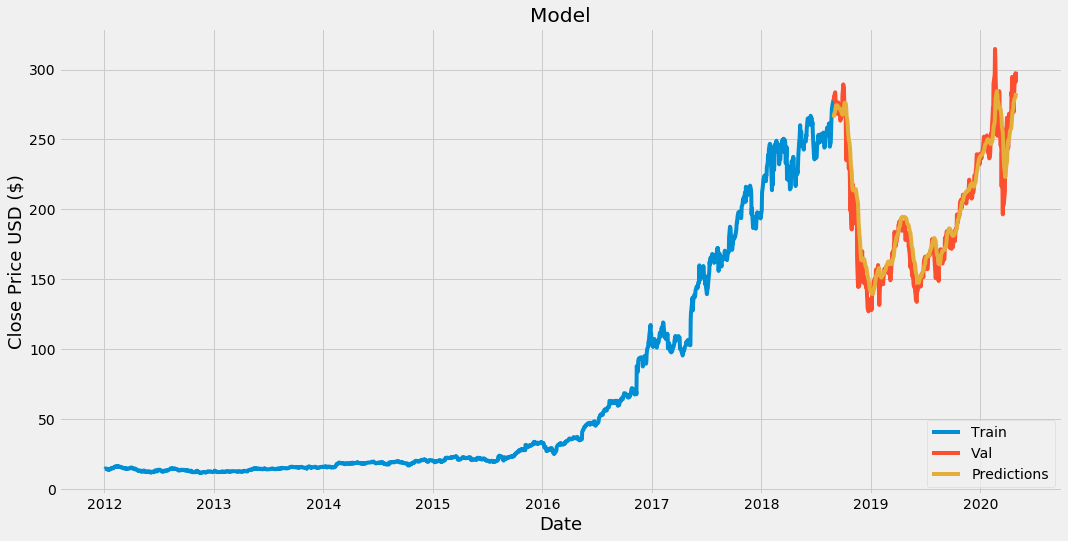

In [68]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.plot(train['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [69]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-30,277.809998,265.658142
2018-08-31,280.679993,267.908539
2018-09-04,283.700012,270.063385
2018-09-05,278.420013,272.198364
2018-09-06,272.720001,273.729889
...,...,...
2020-04-23,284.010010,278.215637
2020-04-24,289.589996,279.065918
2020-04-27,297.079987,280.136566


In [70]:
#Get the quote
apple_quote = web.DataReader('NVDA', data_source='yahoo',start='2012-01-01',end='2020-04-29')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be value between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 dyas
X_test.append(last_60_days_scaled)
#Convert the X_test to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[284.84225]]


In [71]:
apple_quote2 = web.DataReader('NVDA', data_source='yahoo',start='2020-04-30',end='2020-04-30')
print(apple_quote2['Close'])

Date
2020-04-29    298.459991
Name: Close, dtype: float64


In [1]:
from pyspark.dbutils import DButils

ModuleNotFoundError: No module named 'pyspark'